In [1]:
# import libraries
from random import random
from random import randint
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-6d080c5bd7d4>:16: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv('02.desharnais.csv',  header=0)
df.head(10)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1
5,6,6,0,0,86,4,2821,97,89,186,38,192,1
6,7,7,2,1,85,9,2569,119,42,161,25,145,2
7,8,8,1,2,83,13,3913,186,52,238,25,214,1
8,9,9,3,1,85,12,7854,172,88,260,30,247,1
9,10,10,3,4,83,4,2422,78,38,116,24,103,1


In [ ]:
#def load_dataset():
df = pd.read_csv('02.desharnais.csv',  header=0)
df.head()
COL_LIST = ["Language"]
df1 = df.drop(COL_LIST,axis=1)
#df.columns()
data = df1.values
X, y = data[:, :-1], data[:, -1]

In [ ]:
df1.head(10)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
0,1,1,1,4,85,12,5152,253,52,305,34,302
1,2,2,0,0,86,4,5635,197,124,321,33,315
2,3,3,4,4,85,1,805,40,60,100,18,83
3,4,4,0,0,86,5,3829,200,119,319,30,303
4,5,5,0,0,86,4,2149,140,94,234,24,208
5,6,6,0,0,86,4,2821,97,89,186,38,192
6,7,7,2,1,85,9,2569,119,42,161,25,145
7,8,8,1,2,83,13,3913,186,52,238,25,214
8,9,9,3,1,85,12,7854,172,88,260,30,247
9,10,10,3,4,83,4,2422,78,38,116,24,103


In [ ]:
df1.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945


<Axes: title={'center': 'Pearson Correlation of Features'}>

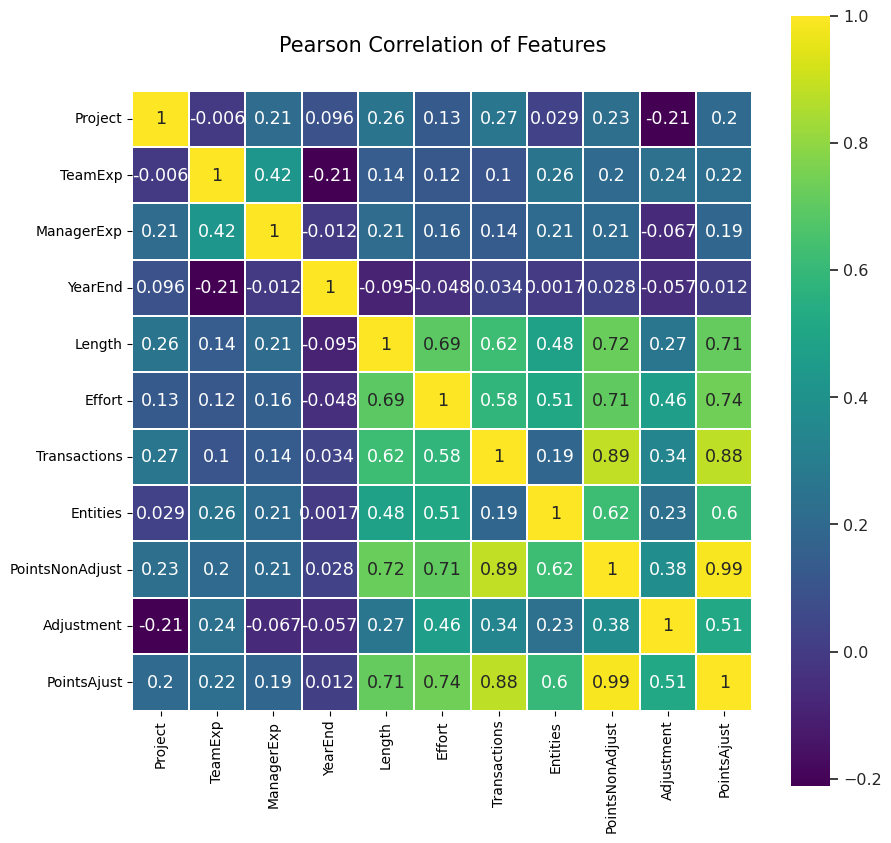

In [ ]:

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df1.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, annot=True)

In [ ]:
df1.head(10)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
0,1,1,1,4,85,12,5152,253,52,305,34,302
1,2,2,0,0,86,4,5635,197,124,321,33,315
2,3,3,4,4,85,1,805,40,60,100,18,83
3,4,4,0,0,86,5,3829,200,119,319,30,303
4,5,5,0,0,86,4,2149,140,94,234,24,208
5,6,6,0,0,86,4,2821,97,89,186,38,192
6,7,7,2,1,85,9,2569,119,42,161,25,145
7,8,8,1,2,83,13,3913,186,52,238,25,214
8,9,9,3,1,85,12,7854,172,88,260,30,247
9,10,10,3,4,83,4,2422,78,38,116,24,103


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def load_dataset():
#preprocessing
 features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']
 max_corr_features = ['Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'PointsAjust']

 X = df1[max_corr_features]
 y = df1['Effort']

# normalize the target
 scaler = MinMaxScaler()
 y = y.values.reshape((len(y), 1))
 y = scaler.fit_transform(y)
 return X, y

In [ ]:

# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
	return mean_absolute_error(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
	return [random() for _ in range(n_examples)]

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
	# copy current solution
	updated = current.copy()
	for i in range(n_changes):
		# select a point to change
		ix = randint(0, len(updated)-1)
		# flip the class label
		updated[ix] = random()
	return updated

# run a hill climb for a set of predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
def hill_climb_testset(X_test, y_test, max_iterations):
	scores = list()
	# generate the initial solution
	solution = random_predictions(X_test.shape[0])
	# evaluate the initial solution
	score = evaluate_predictions(y_test, solution)
	print('>%.3f' % score)
	# hill climb to a solution
	for i in range(max_iterations):
		# record scores
		scores.append(score)
		# stop once we achieve the best score
		if score == 0.0:
			break
		# generate new candidate
		candidate = modify_predictions(solution)
		# evaluate candidate
		value = evaluate_predictions(y_test, candidate)
		# check if it is as good or better
		if value <= score:
			solution, score = candidate, value
			print('>%d, score=%.3f' % (i, score))
	return solution, scores

(81, 5) (81, 1)
(54, 5) (27, 5) (54, 1) (27, 1)
>0.395
>2, score=0.391
>3, score=0.366
>4, score=0.344
>5, score=0.343
>6, score=0.343
>9, score=0.333
>10, score=0.324
>11, score=0.321
>12, score=0.315
>16, score=0.297
>19, score=0.263
>21, score=0.244
>27, score=0.230
>28, score=0.230
>29, score=0.218
>34, score=0.206
>36, score=0.205
>37, score=0.202
>54, score=0.185
>60, score=0.183
>65, score=0.173
>69, score=0.170
>70, score=0.162
>77, score=0.142
>78, score=0.142
>81, score=0.140
>82, score=0.139
>83, score=0.138
>86, score=0.131
>88, score=0.121
>96, score=0.119
>97, score=0.118
>110, score=0.112
>123, score=0.101
>125, score=0.101
>130, score=0.100
>144, score=0.096
>147, score=0.089
>148, score=0.089
>168, score=0.079
>169, score=0.074
>177, score=0.074
>179, score=0.069
>186, score=0.069
>194, score=0.067
>198, score=0.066
>219, score=0.063
>222, score=0.063
>225, score=0.060
>250, score=0.060
>252, score=0.056
>256, score=0.053
>265, score=0.053
>281, score=0.051
>308, score

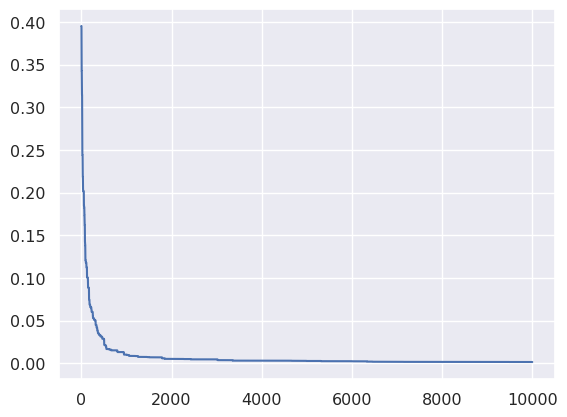

Mean Magnitude of Relative Error: 0.1529465329996843
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  99.98156296766257
Mean square error:  0.0005089253221381921
Root mean square error:  0.22559373265633778
Mean magnitude of percentage error : 9.825559768722202


In [ ]:
# load the dataset
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
X, y = load_dataset()
print(X.shape, y.shape)
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 10000)
# plot the scores vs iterations
pyplot.plot(scores)
pyplot.show()
w1 = np.sqrt(mean_squared_error(y_test, yhat)) *100
X1 = mean_absolute_error(y_test, yhat) * 100
from sklearn.metrics import r2_score
r2 = r2_score(y_test,yhat) * 100
relative_error = np.abs((y_test - yhat) / y_test)
mean_relative_error = mean_absolute_error(y_test, yhat)
median_relative_error = median_absolute_error(y_test, yhat)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,yhat) * 100)
print("Mean square error: ", mean_squared_error(y_test, yhat) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, yhat)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, yhat) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, yhat) * 100)

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
#print(regressor.score(X_test, y_test))
w2 = np.sqrt(mean_squared_error(y_test, predict))*100
X2 = mean_absolute_error(y_test, predict) * 100
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 8.931499666024537
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  48.29961590368743
Mean square error:  1.4271079070275703
Root mean square error:  11.946162174638223
Mean magnitude of percentage error : 259.3859165879847


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
pyplot.show()
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 12.70321502717274
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  -9.313426825596526
Mean square error:  3.017425469730989
Root mean square error:  17.37073823915089
Mean magnitude of percentage error : 615.6007624935385


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
for i in np.arange(100,1100,100):
    regressor1 = RandomForestRegressor(n_estimators=i,max_features=5)
    regressor1.fit(X_train, y_train)
    predict = regressor1.predict(X_test)
    #print(regressor1.score(X_test, y_test))
    relative_error = np.abs((y_test - predict) / y_test)
    mean_relative_error = mean_absolute_error(y_test, predict)
    #print("Relative Error:", relative_error)
    print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
    print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
    print("R squared : " ,r2_score(y_test,predict) * 100)
    print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
    print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
    #print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
    print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 10.311065832011373
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  40.2665947539954
Mean square error:  1.6488468399277387
Root mean square error:  12.840743124631606
Mean magnitude of percentage error : 579.8678152747664
Mean Magnitude of Relative Error: 10.539258246020655
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  39.54487996773065
Mean square error:  1.6687686431425548
Root mean square error:  12.91808284205731
Mean magnitude of percentage error : 569.9395104417099
Mean Magnitude of Relative Error: 10.484765007805088
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  39.89011462032893
Mean square error:  1.6592389827519256
Root mean square error:  12.881145068478677
Mean magnitude of percentage error : 587.9008656819827
Mean Magnitude of Relative Error: 10.459569801056919
Median Magnitude of Relative Error: 0.08078215470240235
R squared :  40.20518189269821
Mean square error:  1.650542

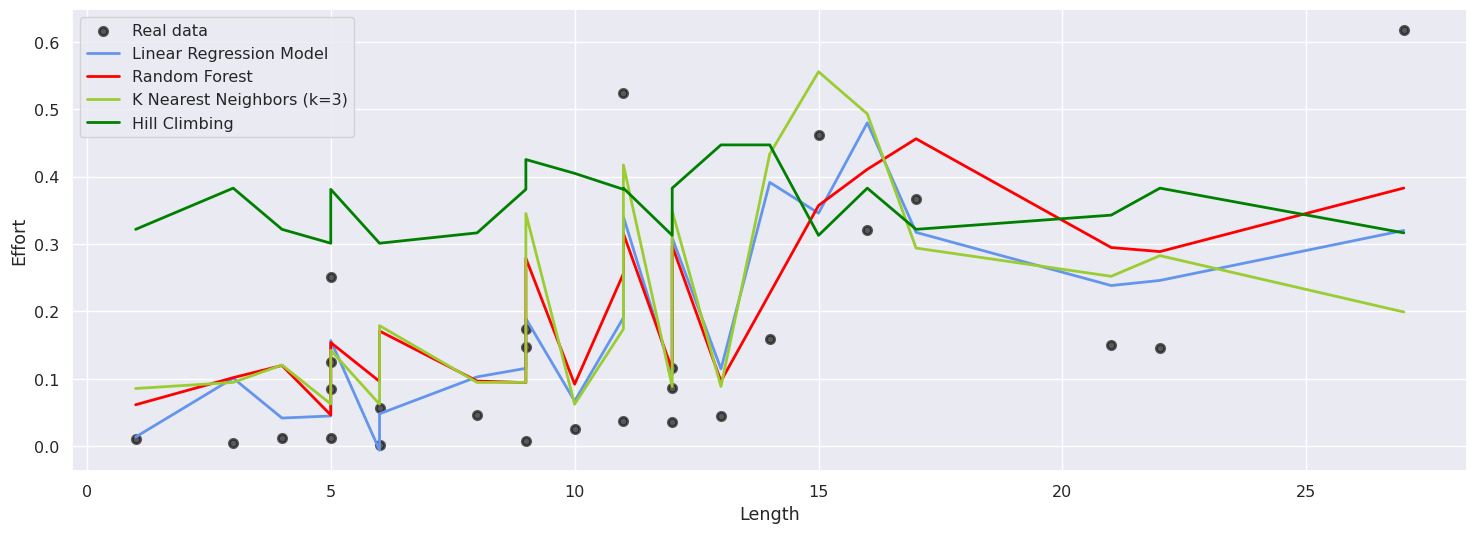

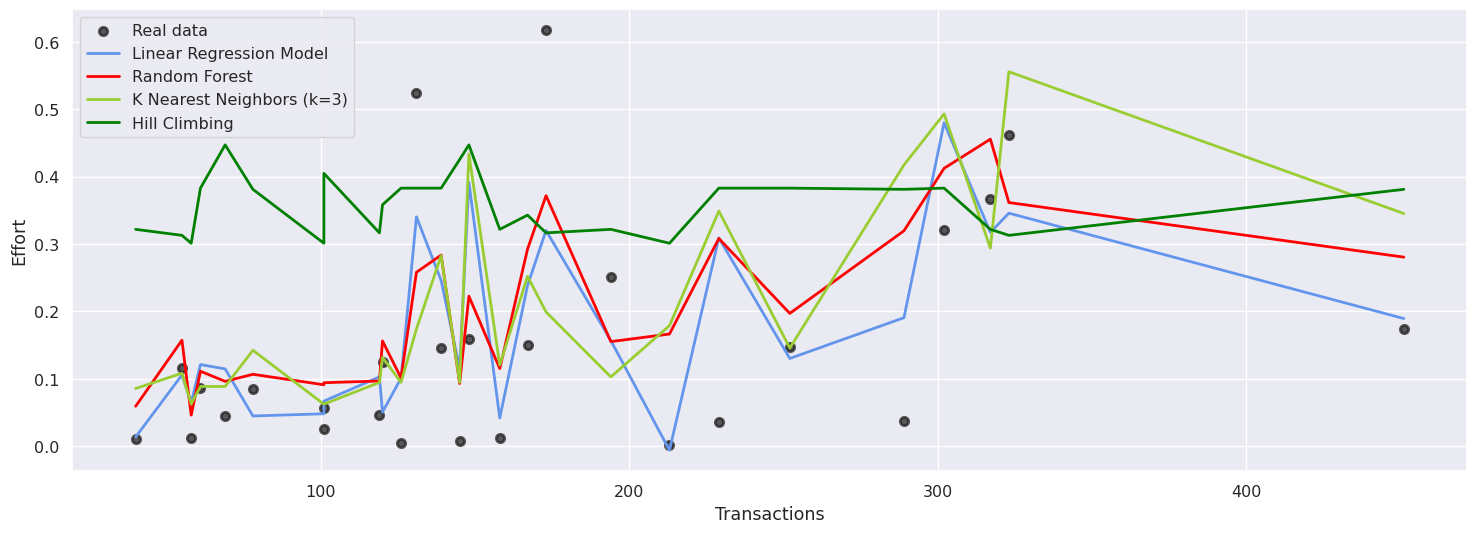

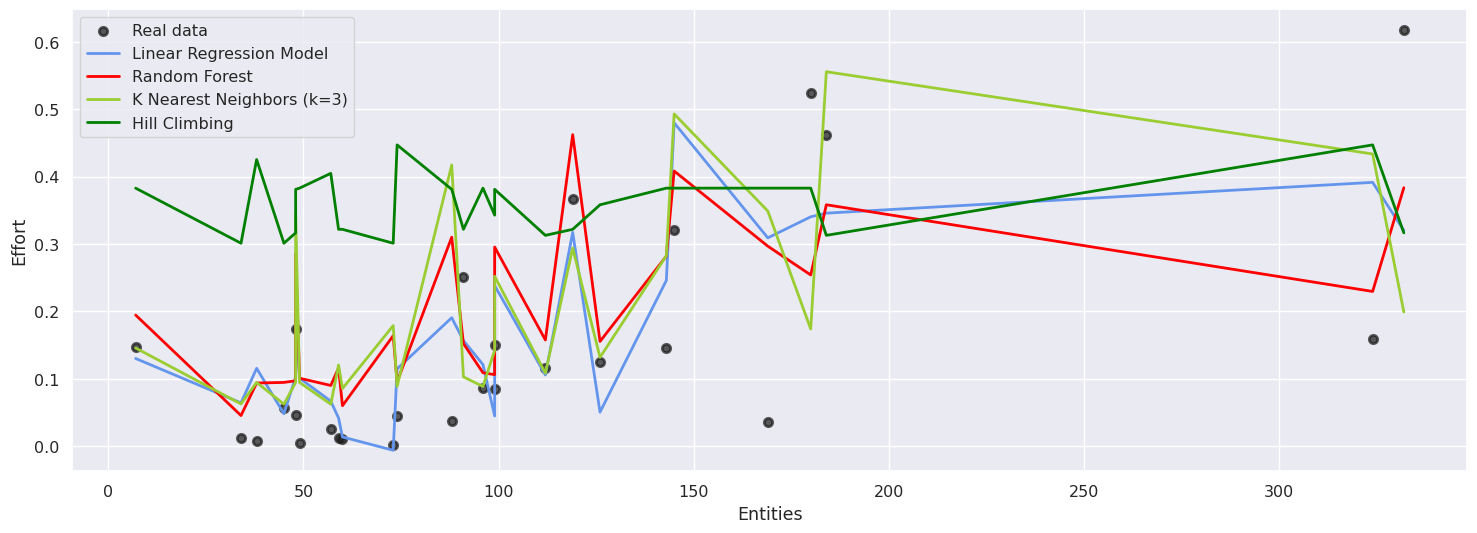

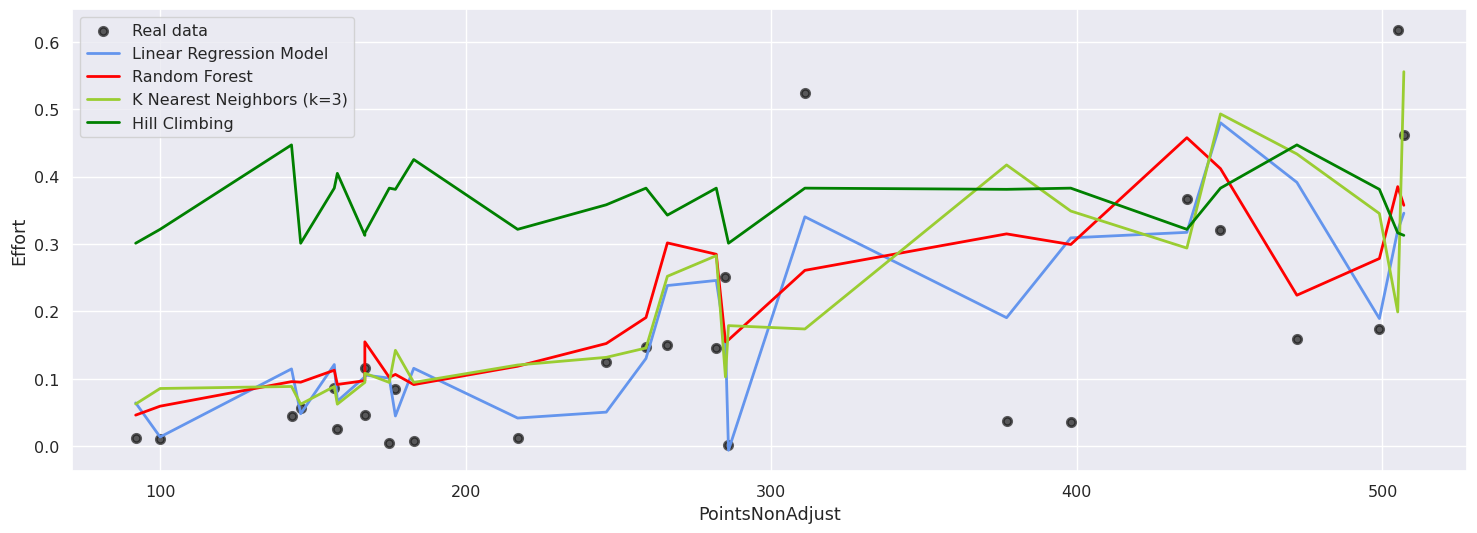

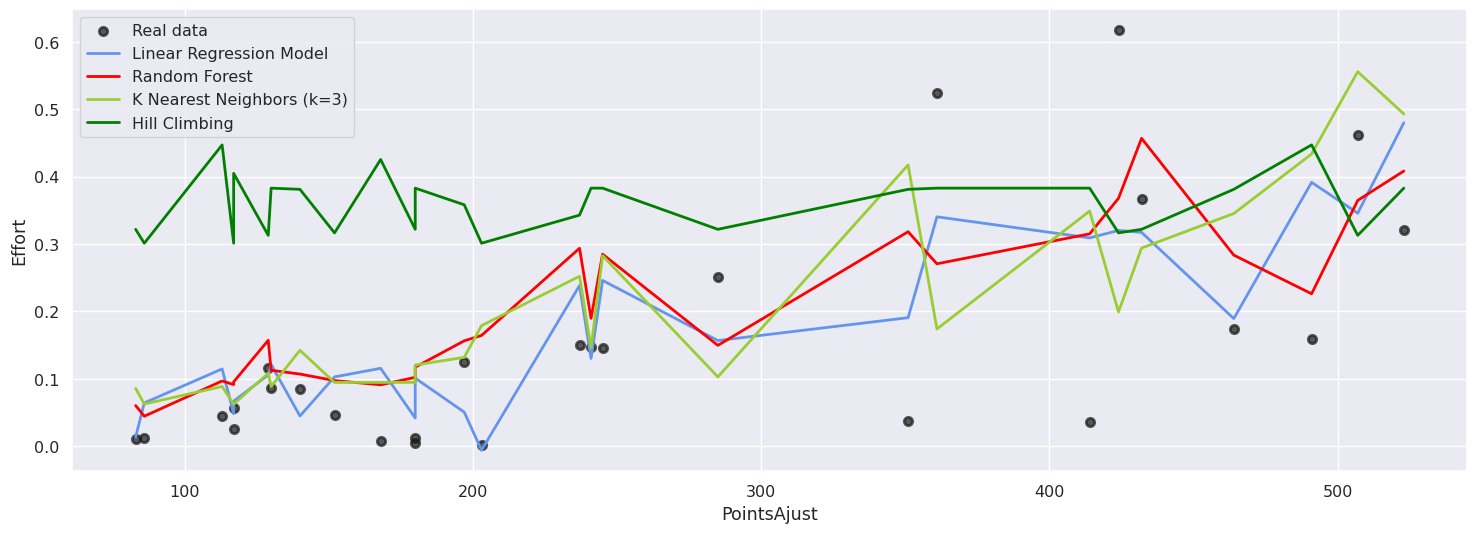

In [ ]:
for i, features in enumerate(X):
    plt.figure(figsize=(18,6))

    # Knn Regression Model
    xs, ys = zip(*sorted(zip(X_test[features], neigh.fit(X_train, y_train).predict(X_test))))

    # Linear Regression Model
    model1_xs, model1_ys = zip(*sorted(zip(X_test[features], regressor.fit(X_train, y_train).predict(X_test))))

    # Random forest
    model2_xs, model2_ys = zip(*sorted(zip(X_test[features], regressor1.fit(X_train, y_train).predict(X_test))))

    # Support Vector Machine
    #svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[features], LinearSVC.fit(X_train, y_train).predict(X_test))))

    # Hill Climbing
    model3_xs, model3_ys = zip(*sorted(zip(X_test[features], scores)))

    #Ensembled Hill climbing
    model4_xs, model4_ys = zip(*sorted(zip(X_test[features], scores)))

    plt.scatter(X_test[features], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model1_xs, model1_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(model2_xs, model2_ys , lw=2, label='Random Forest', c='Red')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
    plt.plot(model3_xs, model3_ys , lw=2,label='Hill Climbing', c='Green')

    plt.xlabel(features)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
predict = LinearSVC.predict(X_test)
#print(LinearSVC.score(X_test, y_test))
print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
print("Mean Absolute error", mean_absolute_error(y_test, predict) * 100)